In [ ]:
import os
path = os.getcwd()
print(path)

/content


In [ ]:
# !pip install gsutil
!chmod 777 ./drive/My\ Drive/Colab\ Notebooks/data.sh
!./drive/My\ Drive/Colab\ Notebooks/data.sh

Copying gs://quickdraw_dataset/full/numpy_bitmap/ant.npy...
/ [1/1 files][ 93.2 MiB/ 93.2 MiB] 100% Done                                    
Operation completed over 1 objects/93.2 MiB.                                     
Copying gs://quickdraw_dataset/full/numpy_bitmap/bear.npy...
- [1/1 files][100.8 MiB/100.8 MiB] 100% Done                                    
Operation completed over 1 objects/100.8 MiB.                                    
Copying gs://quickdraw_dataset/full/numpy_bitmap/camel.npy...
/ [1/1 files][ 90.8 MiB/ 90.8 MiB] 100% Done                                    
Operation completed over 1 objects/90.8 MiB.                                     
Copying gs://quickdraw_dataset/full/numpy_bitmap/cat.npy...
- [1/1 files][ 92.1 MiB/ 92.1 MiB] 100% Done                                    
Operation completed over 1 objects/92.1 MiB.                                     
Copying gs://quickdraw_dataset/full/numpy_bitmap/circle.npy...
/ [1/1 files][ 91.9 MiB/ 91.9 MiB] 100% Do

In [ ]:
category = ["ant",
       "bear",
       "camel",
       "cat",
       "circle",
       "cow",
       "crocodile",
       "dog",
       "elephant", 
       "face",
       "fence",
       "giraffe",
       "grass",
       "hedgehog",
       "horse",
       "monkey", 
       "pig",
       "radio", 
       "rhinoceros",
       "sheep",
       "snake",
       "square",
       "squiggle",
       "stereo",
       "stove",
       "suitcase",
       "tiger"
       ]

In [ ]:
import os
import urllib
import glob
import numpy as np
from tensorflow import keras 
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline


DOWNLOAD_ROOT = "gs://quickdraw_dataset/full/numpy_bitmap/"
DRAWING_PATH = os.path.join("datasets", "drawings")
DRAWING_URL = DOWNLOAD_ROOT + "datasets/drawings/"
IMAGE_SIZE = 28
CAT_NUM = len(category)

# def fetch_drawing_data(drawing_url=DRAWING_URL, drawing_path=DRAWING_PATH):
#     os.makedirs(drawing_path, exist_ok=True)
#     for c in category:
#       filename = c + ".npy"
#       filepath = os.path.join(drawing_path, filename)
#       downloading_file = DOWNLOAD_ROOT + filename
#       if not os.path.exists(filepath):
#         print(downloading_file)
#         # urllib.request.urlretrieve(downloading_file, filepath)
#         !gsutil -m cp downloading_file filepath
#       else:
#         os.remove(filepath);

In [ ]:
def save_dataset(data, name_prefix, idx):
    drawing_dir = os.path.join(DRAWING_PATH, name_prefix)
    os.makedirs(drawing_dir, exist_ok=True)
    path_format = os.path.join(drawing_dir, "{}_{}.npy")
    npy_file = path_format.format(name_prefix, category[idx])
    if not os.path.exists(npy_file):
      np.save(npy_file, data)
    return None

In [ ]:
def load_file_path(select, drawing_path=DRAWING_PATH):
  all_files = sorted(glob.glob(os.path.join(drawing_path, select, '*.npy')))
  return all_files

In [ ]:
from sklearn.model_selection import train_test_split

def split_data(drawing_path=DRAWING_PATH, ratio = 0.2):
  all_files = sorted(glob.glob(os.path.join(drawing_path, '*.npy')))
  
  #load each data file 
  for idx, file in enumerate(all_files):
      data = np.load(file)
      labels = np.full(data.shape[0], idx)

      combined = np.c_[data,labels]
      X_train_full, X_test, y_train_full, y_test = train_test_split(
          combined, labels.reshape(-1, 1), random_state=42)
      save_dataset(X_test, "test", idx)
      X_train, X_valid, y_train, y_valid = train_test_split(
        X_train_full, y_train_full, random_state=42)
      save_dataset(X_train, "train", idx)
      save_dataset(X_valid, "valid", idx)

In [ ]:
def load_data(drawing_path=DRAWING_PATH, vfold_ratio=0.2, max_items_per_class= 20000):
  all_files = load_file_path("")
  
  #initialize variables 
  x = np.empty([0, 784])
  y = np.empty([0])

  #load each data file 
  for idx, file in enumerate(all_files):
      data = np.load(file)
      data = data[0: max_items_per_class, :]
      labels = np.full(data.shape[0], idx)

      x = np.concatenate((x, data), axis=0)
      y = np.append(y, labels)
  data = None
  labels = None

  #separate into training and testing 
  X_train, X_test, y_train, y_test = train_test_split(
      x, y, test_size=vfold_ratio, shuffle=True, random_state=42)
  
  return X_train, X_test, y_train, y_test

In [ ]:
X_train_origin, X_test_origin, y_train_origin, y_test_origin = load_data()

In [ ]:
X_train = np.copy(X_train_origin)
X_test = np.copy(X_test_origin)
y_train = np.copy(y_train_origin)
y_test = np.copy(y_test_origin)

In [ ]:
print(len(X_train))

432000


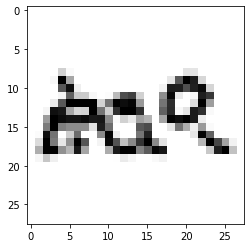

In [ ]:
file = os.path.join(DRAWING_PATH, "ant.npy")
data = np.load(file)
data = data.reshape(data.shape[0], IMAGE_SIZE, IMAGE_SIZE).astype('float32')
data /= 255.0
plt.imshow(data[3], cmap="Greys")

In [ ]:
# Reshape and normalize
# x_train = x_train.reshape(x_train.shape[0], image_size, image_size, 1).astype('float32')
# x_test = x_test.reshape(x_test.shape[0], image_size, image_size, 1).astype('float32')

# x_train /= 255.0
# x_test /= 255.0

# # Convert class vectors to class matrices
# y_train = keras.utils.to_categorical(y_train, 27)
# y_test = keras.utils.to_categorical(y_test, 27)

In [ ]:
X_train = X_train.reshape(X_train.shape[0], IMAGE_SIZE, IMAGE_SIZE, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], IMAGE_SIZE, IMAGE_SIZE, 1).astype('float32')
X_train /= 255.0
X_test /= 255.0
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [ ]:
y_test.shape

(108000, 27)

In [ ]:
X_train.shape

(432000, 28, 28, 1)

In [ ]:
# Define model
model = keras.Sequential()
model.add(keras.layers.Convolution2D(16, (3, 3),
                        padding='same',
                        input_shape=X_train.shape[1:], activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Convolution2D(32, (3, 3), padding='same', activation= 'relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Convolution2D(64, (3, 3), padding='same', activation= 'relu'))
model.add(keras.layers.MaxPooling2D(pool_size =(2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(27, activation='softmax')) 
# Train model
adam = tf.optimizers.Adam()
model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['top_k_categorical_accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 64)          18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 576)               0

In [ ]:
model.fit(x = X_train, y = y_train, validation_split=0.1, batch_size = 256, verbose=2, epochs=5)

Epoch 1/5
1519/1519 - 9s - loss: 1.2584 - top_k_categorical_accuracy: 0.8890 - val_loss: 0.9610 - val_top_k_categorical_accuracy: 0.9333
Epoch 2/5
1519/1519 - 9s - loss: 0.8874 - top_k_categorical_accuracy: 0.9403 - val_loss: 0.8666 - val_top_k_categorical_accuracy: 0.9423
Epoch 3/5
1519/1519 - 9s - loss: 0.7969 - top_k_categorical_accuracy: 0.9483 - val_loss: 0.7797 - val_top_k_categorical_accuracy: 0.9484
Epoch 4/5
1519/1519 - 9s - loss: 0.7443 - top_k_categorical_accuracy: 0.9528 - val_loss: 0.7445 - val_top_k_categorical_accuracy: 0.9522
Epoch 5/5
1519/1519 - 9s - loss: 0.7074 - top_k_categorical_accuracy: 0.9561 - val_loss: 0.7132 - val_top_k_categorical_accuracy: 0.9542


In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test accuarcy: {:0.2f}%'.format(score[1] * 100))

Test accuarcy: 95.33%


In [ ]:
model.save('keras_3.h5')

In [ ]:
def npy_reader_dataset(filepaths, repeat=1, n_readers=5,
                       n_read_threads=None, shuffle_buffer_size=10000,
                       n_parse_threads=5, batch_size=32):
    dataset = tf.data.Dataset.list_files(filepaths).repeat(repeat)
    # for element in dataset:
    #   print(element)
    # dataset = tf.data.Dataset.from_tensor_slices(filepaths)
    labeled_ds = dataset.map(preprocess, num_parallel_calls=n_parse_threads)
    # dataset = dataset.interleave(
    #     lambda filepath: tf.data.TextLineDataset(filepath),
    #     cycle_length=n_readers, num_parallel_calls=n_read_threads)
    # dataset = dataset.shuffle(shuffle_buffer_size)
    # dataset = dataset.map(preprocess, num_parallel_calls=n_parse_threads)
    # dataset = dataset.batch(batch_size)
    return dataset.prefetch(1)